# Hipotesis sobre proporciones

1. Leer [acá](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html)

2. Leer [acá](https://en.wikipedia.org/wiki/Binomial_test)

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import fisher_exact
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.linear_model import LogisticRegression

## Ejemplo

1. Whiskas afirma que el 80\% de las gatos prefieren su comida.

2. De 100 gatos encuestados, 68 prefirieron whiskas.

$$H_0 \, . \; p=0.8$$
$$H_a \, . \; p\neq 0.8$$


In [2]:
stats.binom_test(775, n=1000, p=0.8, alternative ="two-sided")

<ipython-input-2-620d995259e4>:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(775, n=1000, p=0.8, alternative ="two-sided")


0.05263564900127678

In [3]:
stats.norm.ppf(0.0005)

-3.2905267314918945

# Relación entre dos variables nominales


Los test exactos calculan la probabilidad de obtener los resultados observados de forma directa generando todos los posibles escenarios y calculando la proporción en los que se cumple la condición estudiada (son test de permutaciones). Los test aproximados calculan primero un estadístico y luego emplean la distribución teórica de dicho estadístico para obtener la probabilidad de que adquiera valores iguales o más extremos.

Existe bastante controversia en cuanto a si se deben de utilizar test exactos o aproximados. En la era pre-computacional, los test exactos se complicaban mucho cuando el tamaño total de muestras aumentaba, sin embargo, por medio de la computación esta barrera se ha eliminado. Los test exactos son más precisos cuando el tamaño total de observaciones es bajo o alguno de los grupos tiene pocas observaciones, una vez alcanzado un número alto de observaciones las diferencias son mínimas. En el libro Handbook of Biological Statistics John H. McDonald se recomienda utilizar test exactos cuando el número total de observaciones es menor a 1000 o cuando, aunque el número total sea mayor a 1000, haya algún grupo cuyo número de eventos esperados sea pequeño (normalmente menor que 5). En el caso de aplicar test aproximados sobre tamaños pequeños se suelen emplear correcciones, las más frecuentes son la corrección de continuidad de Yate o la corrección de William.

Se puede considerar a los test basados el estadístico χ2
 como una generalización del contraste de proporciones basado en la aproximación a la normal (Z-test de una proporción y Z-test de dos proporciones) cuando hay 2 o más variables cualitativas o alguna de ellas tiene 2 o más niveles. En aquellos casos en los que ambos test se pueden aplicar, el resultado de un Z-test y un test χ2
 es equivalente. Esto es debido a que en la distribución chi-cuadrado con 1 grado de libertad el estadístico χ2
 es igual al estadístico Z
 de una distribución normal, elevado al cuadrado.

 Para leer [más](https://rpubs.com/Joaquin_AR/220579)

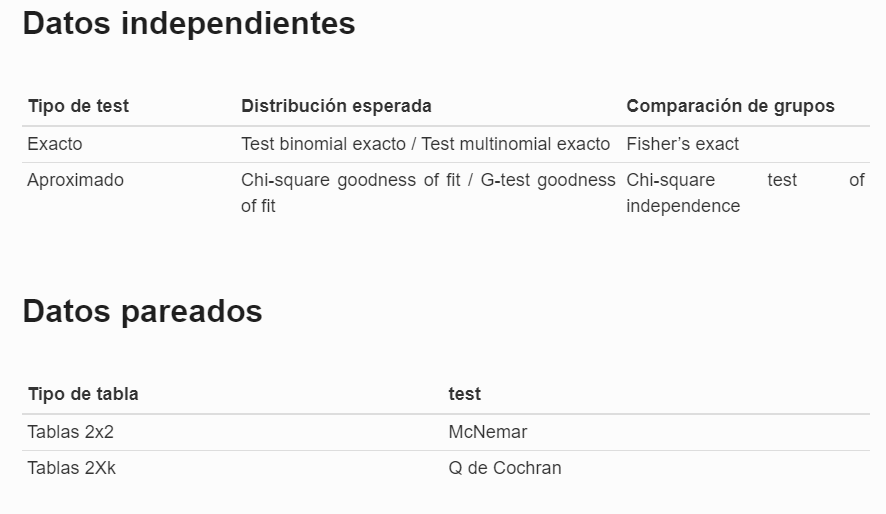

## Prueba $\chi^2$


La prueba de independencia Chi cuadrado permite determinar si existe asociación entre dos variables discretas. Sus supuestos de aplicación son:

1. La muestra es un subconjunto aleatorio de la población.
2. Los valores esperados son mayores o iguales a 5.
3. Las variables discretas poseen menos de 20 niveles cada una.
4. La prueba de independencia Chi cuadrado permite evaluar la siguientes hipótesis:
* $H_0:$ Las variables son independientes
* $H_1:$ las variables están relacionadas
Veamos un ejemplo.

$$\chi^2 = \sum_{cat}\frac{(Obs-Esp)^2}{Esp}$$

In [4]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Diabetes.csv"
Diabetes=pd.read_csv(url, sep=";")
Diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
tabla=pd.crosstab(Diabetes["Gender"], Diabetes["Alopecia"])
tabla

Alopecia,No,Yes
Gender,,
Female,165,27
Male,176,152


In [6]:
tabla=pd.crosstab(Diabetes["Gender"], Diabetes["Alopecia"])
chi2_contingency(tabla)

Chi2ContingencyResult(statistic=54.478989808861385, pvalue=1.5711869402979992e-13, dof=1, expected_freq=array([[125.90769231,  66.09230769],
       [215.09230769, 112.90769231]]))

In [7]:
b,c,d,e=chi2_contingency(tabla)

#### ¿Que son estos 4 valores?

### Coeficiente C de contingencia (Fuerza de la asociación)

Por la cantidad de datos, es muy complejo realizar pruebas de hipotesis

$$C_{Corr}=\sqrt{\frac{k}{k-1}}\sqrt{\frac{\chi^2}{n+\chi^2}}$$

Donde $Chi$ es el valor de la chi cuadrado, n es el número de datos y
$$k=min(Categorias X, Categorias Y)$$

Para mas información [acá](https://es.wikipedia.org/wiki/Coeficiente_de_contingencia)

In [8]:
k=min(tabla.shape)
CC=np.sqrt(k/(k-1))*np.sqrt(b/(b+Diabetes.shape[0])) 
CC

0.4355042983693148

#### Ejercicio 1

Crear una matriz de coeficientes de contingencia para la base de datos de Diabetes

In [9]:
tabla=pd.crosstab(Diabetes["Gender"], Diabetes["Polyuria"])
b,c,d,e=chi2_contingency(tabla)
k=min(tabla.shape)
CC=np.sqrt(k/(k-1))*np.sqrt(b/(b+Diabetes.shape[0]))
CC

0.3621458320728672

### Solución

In [10]:
basecuali = Diabetes.select_dtypes(include="object")
vari = basecuali.columns
matrizCoef = np.diag(np.zeros(len(vari)))
matrizCoef

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [11]:
for fila in range(len(vari)):
  for columna in range(len(vari)):
    tabla=pd.crosstab(Diabetes[vari[fila]], Diabetes[vari[columna]])
    b,c,d,e=chi2_contingency(tabla)
    k=min(tabla.shape)
    CC=np.sqrt(k/(k-1))*np.sqrt(b/(b+Diabetes.shape[0]))
    matrizCoef[fila, columna] =CC

In [12]:
matrizCoef = pd.DataFrame(matrizCoef, index=vari, columns=vari)
matrizCoef

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Gender,0.997929,0.362146,0.416595,0.378533,0.169111,0.298541,0.282910,0.282792,0.068523,0.012848,0.137904,0.441079,0.121771,0.435504,0.000116,0.575115
Polyuria,0.362146,0.998071,0.722902,0.573138,0.354704,0.490758,0.116492,0.318599,0.118995,0.321245,0.204328,0.567148,0.208370,0.196276,0.170487,0.780626
Polydipsia,0.416595,0.722902,0.998050,0.527537,0.441398,0.422386,0.033135,0.439984,0.175201,0.275928,0.157145,0.567761,0.246119,0.414914,0.131703,0.766346
sudden weight loss,0.378533,0.573138,0.527537,0.998017,0.379955,0.329513,0.120020,0.091496,0.000870,0.190289,0.118695,0.355961,0.148694,0.275513,0.229001,0.561457
weakness,0.169111,0.354704,0.441398,0.379955,0.998012,0.245600,0.032645,0.402784,0.413232,0.199017,0.445106,0.367413,0.354749,0.121708,0.057169,0.329079
Polyphagia,0.298541,0.490758,0.422386,0.329513,0.245600,0.998056,0.083399,0.393471,0.196802,0.323475,0.356000,0.490360,0.426175,0.069825,0.034830,0.453480
Genital thrush,0.282910,0.116492,0.033135,0.120020,0.032645,0.083399,0.997214,0.201244,0.169487,0.216835,0.184350,0.265249,0.134330,0.277330,0.067336,0.148432
visual blurring,0.282792,0.318599,0.439984,0.091496,0.402784,0.393471,0.201244,0.998050,0.390535,0.102378,0.242278,0.479317,0.534664,0.014896,0.146077,0.339541
Itching,0.068523,0.118995,0.175201,0.000870,0.413232,0.196802,0.169487,0.390535,0.998070,0.153958,0.579760,0.158495,0.292767,0.359011,0.000000,0.013335
Irritability,0.012848,0.321245,0.275928,0.190289,0.199017,0.323475,0.216835,0.102378,0.153958,0.997371,0.171781,0.205733,0.273349,0.055091,0.171009,0.399963


<Axes: >

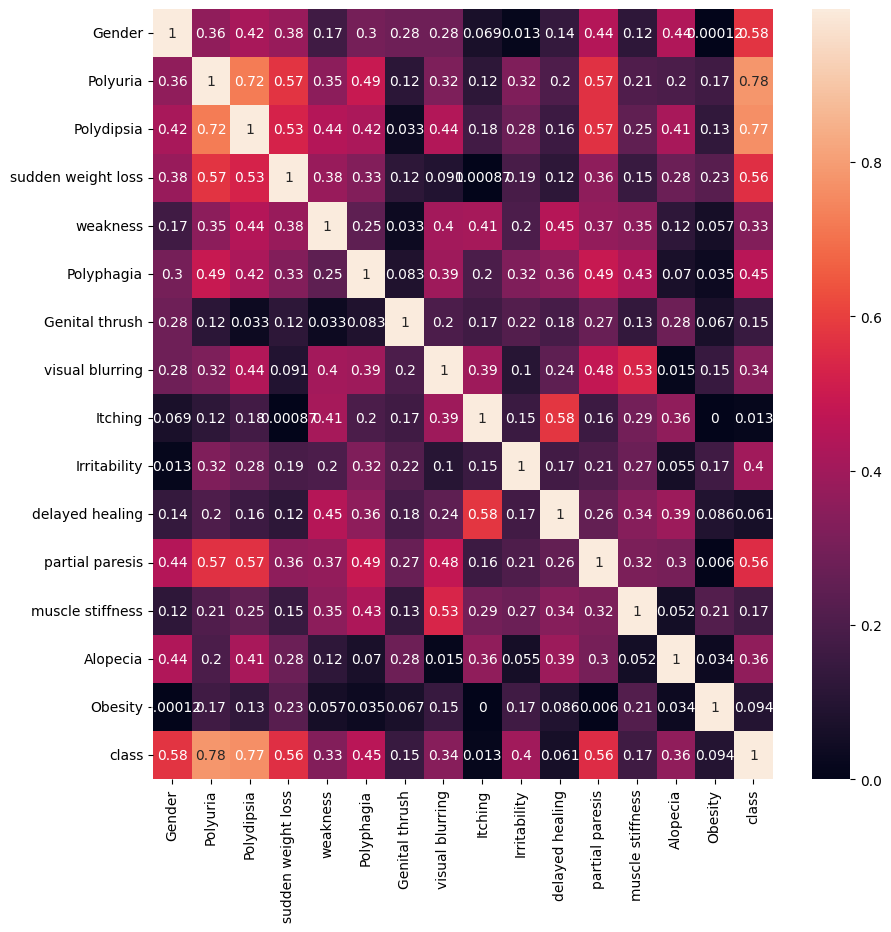

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(matrizCoef, annot=True)

In [14]:
tabla=pd.crosstab(Diabetes["class"], Diabetes["Polyuria"])
b,c,d,e=chi2_contingency(tabla)
k=min(tabla.shape)
CC=np.sqrt(k/(k-1))*np.sqrt(b/(b+Diabetes.shape[0]))
CC

0.7806255482685815

In [15]:
chi2_contingency(tabla)

Chi2ContingencyResult(statistic=227.86583895496773, pvalue=1.7409117803442155e-51, dof=1, expected_freq=array([[100.76923077,  99.23076923],
       [161.23076923, 158.76923077]]))

In [16]:
tabla

Polyuria,No,Yes
class,,
Negative,185,15
Positive,77,243


## Test Exacto de Fisher

La prueba de Fisher es el test exacto utilizado cuando se quiere estudiar si existe asociación entre dos variables cualitativas, es decir, si las proporciones de una variable son diferentes dependiendo del valor que adquiera la otra variable. En la gran mayoría de casos, el test de Fisher se aplica para comparar dos variables categóricas con dos niveles cada una (tabla 2x2). Es posible utilizarlo con tablas 2xK niveles pero los requerimientos de cálculo son altos.

In [17]:
fisher_exact(tabla)

SignificanceResult(statistic=38.922077922077925, pvalue=4.318712403212926e-58)

## ANOVA

**Tabla de analisis de Varianza**: La técnica de análisis de varianza (ANOVA) también conocida como análisis factorial y desarrollada por Fisher en 1930, constituye la herramienta básica para el estudio del efecto de uno o más factores (cada uno con dos o más niveles) sobre la media de una variable continua. Es por lo tanto el test estadístico a emplear cuando se desea comparar las medias de dos o más grupos. Esta técnica puede generalizarse también para estudiar los posibles efectos de los factores sobre la varianza de una variable.

La hipótesis nula de la que parten los diferentes tipos de ANOVA es que la media de la variable estudiada es la misma en los diferentes grupos, en contraposición a la hipótesis alternativa de que al menos dos medias difieren de forma significativa. ANOVA permite comparar múltiples medias, pero lo hace mediante el estudio de las varianzas.

El funcionamiento básico de un ANOVA consiste en calcular la media de cada uno de los grupos para a continuación comparar la varianza de estas medias (varianza explicada por la variable grupo, intervarianza) frente a la varianza promedio dentro de los grupos (la no explicada por la variable grupo, intravarianza). Bajo la hipótesis nula de que las observaciones de los distintos grupos proceden todas la misma población (tienen la misma media y varianza), la varianza ponderada entre grupos será la misma que la varianza promedio dentro de los grupos. Conforme las medias de los grupos estén más alejadas las unas de las otras, la varianza entre medias se incrementará y dejará de ser igual a la varianza promedio dentro de los grupos.

- Más información [acá](https://www.cienciadedatos.net/documentos/19_anova)

In [18]:
Diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [19]:
modeloAge = ols('Age ~ Gender+Polyuria+Polydipsia',
                data=Diabetes).fit()
modeloAge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.26e-06
Time:                        23:09:21   Log-Likelihood:                -2020.8
No. Observations:                 520   AIC:                             4050.
Df Residuals:                     516   BIC:                             4067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            42.8127      1.180     36.277      0.000      40.494      45.131
Gender[T.Male]        3.4062      1.139      2.991      0.003       1.169       5.643
Polyuria[T.Yes]       4.8677      1.304      3.734      0.000       2.307       7.429
Polydipsia[T.Yes]     1.4563      1.329      1.096      0.274      -1.154       4.067
==============================================================================
Omnibus:                       10.755   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.044
Skew:                           0.357   Prob(JB):                      0.00400
Kurtosis:                       3.006   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print(modeloAge.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.26e-06
Time:                        23:09:21   Log-Likelihood:                -2020.8
No. Observations:                 520   AIC:                             4050.
Df Residuals:                     516   BIC:                             4067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            42.8127      1.18

## Tabla ANOVA

In [21]:
tablaANOVA = sm.stats.anova_lm(modeloAge)
print(tablaANOVA)

               df        sum_sq      mean_sq          F        PR(>F)
Gender        1.0    302.928588   302.928588   2.162438  1.420297e-01
Polyuria      1.0   3878.673916  3878.673916  27.687680  2.093947e-07
Polydipsia    1.0    168.262386   168.262386   1.201131  2.736070e-01
Residual    516.0  72284.702417   140.086633        NaN           NaN


In [22]:
tablaANOVA

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,302.928588,302.928588,2.162438,1.420297e-01
Polyuria,1.0,3878.673916,3878.673916,27.687680,2.093947e-07
Polydipsia,1.0,168.262386,168.262386,1.201131,2.736070e-01
Residual,516.0,72284.702417,140.086633,NaN,NaN


### $R^2$ de cada variable

El cociente dado por:
$$R^2_{factor}= \frac{SCFactor}{SCtotal}$$

me arroja el R^2 de cada uno de los factores de la regresión y sirve para ver que variables afectan en mayor medida la variación de la respuesta

# Multicolinealidad


In [23]:
url ="/content/drive/MyDrive/2023/Fundamentos de Estadistica/Hojas de datos/Saber_11__2019-2.csv"
datosIcfes = pd.read_csv(url, index_col=5)
datosIcfes.head()

<ipython-input-23-af46fb2d7901>:2: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  datosIcfes = pd.read_csv(url, index_col=5)


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201940031558,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,-,MAGDALENA,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
SB11201940303339,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
SB11201940255017,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,-,BOLIVAR,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
SB11201940154799,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,ESTUDIANTE,Si,COLOMBIA,Ninguno,BOGOTÁ,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
SB11201940280831,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO


In [29]:
datosIcfes.dtypes[-20:]

DESEMP_LECTURA_CRITICA             int64
PUNT_MATEMATICAS                   int64
PERCENTIL_MATEMATICAS              int64
DESEMP_MATEMATICAS                 int64
PUNT_C_NATURALES                   int64
PERCENTIL_C_NATURALES              int64
DESEMP_C_NATURALES                 int64
PUNT_SOCIALES_CIUDADANAS           int64
PERCENTIL_SOCIALES_CIUDADANAS      int64
DESEMP_SOCIALES_CIUDADANAS         int64
PUNT_INGLES                      float64
PERCENTIL_INGLES                   int64
DESEMP_INGLES                     object
PUNT_GLOBAL                        int64
PERCENTIL_GLOBAL                  object
ESTU_INSE_INDIVIDUAL              object
ESTU_NSE_INDIVIDUAL               object
ESTU_NSE_ESTABLECIMIENTO         float64
ESTU_ESTADOINVESTIGACION          object
ESTU_GENERACION-E                 object
dtype: object

### Regresion

1. Y = PUNTAJE GLOBAL

2. X1 = PUNTAJE INGLES
3. X2 = PUNTAJE MATEMATICAS
4. X3 = PUNTAJE C_NATURALES
5. X4 = PUNT S y C
6. X5 = PUnta LECTURA CRITICA

In [32]:
datosIcfesSinNA = datosIcfes[["PUNT_GLOBAL", "PUNT_MATEMATICAS", "PUNT_C_NATURALES",
                              "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES","PUNT_LECTURA_CRITICA"]].dropna()

X = datosIcfesSinNA.drop("PUNT_GLOBAL", axis=1)
Y = datosIcfesSinNA["PUNT_GLOBAL"]
X = sm.add_constant(X)

In [35]:
modelo = sm.OLS(Y, X)
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.483e+09
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -94695.
No. Observations:              546193   AIC:                         1.894e+05
Df Residuals:                  546187   BIC:                         1.895e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
datosIcfesSinNA["Indicadora"] = np.where(datosIcfesSinNA["PUNT_GLOBAL"]>250,1,0) 
Y = datosIcfesSinNA["Indicadora"]
X = datosIcfesSinNA[["PUNT_GLOBAL"]]
X1 = sm.add_constant(X)
X

,PUNT_GLOBAL
ESTU_CONSECUTIVO,
SB11201940031558,208
SB11201940303339,299
SB11201940255017,299
SB11201940154799,309
SB11201940280831,288
...,...
SB11201940195862,360
SB11201940253002,360
SB11201940364767,377


In [47]:
logreg=LogisticRegression(C=1) ### Llamo la regresión logistica, con todos
### los valores por defecto
logreg.fit(X, Y) ## Entreno el modelo
print("Intercepto", logreg.intercept_)
print("Beta",pd.DataFrame(np.transpose(logreg.coef_), index=X.columns, columns=["betas"])) ## 

Intercepto [-2873.09799282]
Beta                 betas
PUNT_GLOBAL  11.46861


## sm (Estadistica)

In [50]:
sm.Logit(Y[0:2000], X1[0:2000]).fit()

         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# ANOVA

In [58]:
url ="/content/drive/MyDrive/2023/Fundamentos de Estadistica/Hojas de datos/Saber_11__2019-2.csv"
datosIcfes = pd.read_csv(url, index_col=5, na_values="-")
datosIcfes.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201940031558,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,MAGDALENA,...,54.0,67,A1,208,25.0,50.942156,2.0,2.0,PUBLICAR,NO
SB11201940303339,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,BOGOTÁ,...,63.0,88,A2,299,83.0,59.767864,3.0,4.0,PUBLICAR,NO
SB11201940255017,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,BOLIVAR,...,64.0,89,A2,299,84.0,50.764238,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
SB11201940154799,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,ESTUDIANTE,Si,COLOMBIA,Ninguno,BOGOTÁ,...,53.0,67,A1,309,88.0,45.779135,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
SB11201940280831,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,BOGOTÁ,...,52.0,63,A1,288,78.0,52.910946,3.0,3.0,PUBLICAR,NO


In [52]:
datosIcfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA',
       'ESTU_PAIS_RESIDE', 'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',
      

In [57]:
datosIcfesSinNA.groupby("ESTU_GENERO").size()

ESTU_GENERO
-       120
F    287544
M    241525
dtype: int64

In [69]:
datosIcfesSinNA = datosIcfes[["PUNT_GLOBAL", "ESTU_GENERO", 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA']].dropna()

#datosIcfesSinNA = datosIcfes[["PUNT_GLOBAL", "ESTU_GENERO"]].dropna()

X = datosIcfesSinNA.drop("PUNT_GLOBAL", axis=1)
X1 = pd.get_dummies(X, drop_first=True)
Y = datosIcfesSinNA["PUNT_GLOBAL"]
X1 = sm.add_constant(X1)
X1

,const,ESTU_GENERO_M,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENEMOTOCICLETA_Si
ESTU_CONSECUTIVO,,,,
SB11201940031558,1.0,1,0,0
SB11201940303339,1.0,1,1,0
SB11201940255017,1.0,1,0,0
SB11201940154799,1.0,1,0,0
SB11201940280831,1.0,1,0,0
...,...,...,...,...
SB11201940195862,1.0,1,0,1
SB11201940253002,1.0,1,0,1
SB11201940364767,1.0,1,1,1


In [71]:
datosIcfesSinNA.groupby(["ESTU_GENERO",'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA'], as_index=False).mean()

,ESTU_GENERO,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,PUNT_GLOBAL
0,F,No,No,238.877689
1,F,No,Si,235.068998
2,F,Si,No,273.145081
3,F,Si,Si,247.612408
4,M,No,No,249.080216
5,M,No,Si,241.761938
6,M,Si,No,280.487791
7,M,Si,Si,251.714095


In [72]:
modelo = sm.OLS(Y, X1)
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        23:53:10   Log-Likelihood:            -2.8072e+06
No. Observations:              527132   AIC:                         5.614e+06
Df Residuals:                  527128   BIC:                         5.614e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## ¿Cuánto afecta cada variable a la variable respuesta?

In [74]:
modeloAge = ols('PUNT_GLOBAL ~ESTU_GENERO+FAMI_TIENEAUTOMOVIL+FAMI_TIENEMOTOCICLETA',
                data=datosIcfesSinNA).fit()
print(modeloAge.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        00:00:00   Log-Likelihood:            -2.8072e+06
No. Observations:              527132   AIC:                         5.614e+06
Df Residuals:                  527128   BIC:                         5.614e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [76]:
tablaANOVA = sm.stats.anova_lm(modeloAge)
tablaANOVA

,df,sum_sq,mean_sq,F,PR(>F)
ESTU_GENERO,1.0,9.509367e+06,9.509367e+06,3846.266311,0.0
FAMI_TIENEAUTOMOVIL,1.0,5.195826e+07,5.195826e+07,21015.627552,0.0
FAMI_TIENEMOTOCICLETA,1.0,1.458670e+07,1.458670e+07,5899.900579,0.0
Residual,527128.0,1.303252e+09,2.472363e+03,NaN,NaN


In [79]:
100*tablaANOVA["sum_sq"]/sum(tablaANOVA["sum_sq"])

ESTU_GENERO               0.689431
FAMI_TIENEAUTOMOVIL       3.766985
FAMI_TIENEMOTOCICLETA     1.057539
Residual                 94.486045
Name: sum_sq, dtype: float64

In [80]:
fig = px.box(datosIcfesSinNA, x="FAMI_TIENEMOTOCICLETA", y="PUNT_GLOBAL")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [83]:
datosIcfesSinNA.groupby("FAMI_TIENEMOTOCICLETA").mean()

<ipython-input-83-b9b4b8703f02>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,PUNT_GLOBAL
FAMI_TIENEMOTOCICLETA,
No,250.973509
Si,241.096967


In [84]:
datosIcfesSinNA.groupby("FAMI_TIENEMOTOCICLETA").var()

<ipython-input-84-2809c59244de>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,PUNT_GLOBAL
FAMI_TIENEMOTOCICLETA,
No,2733.946541
Si,2395.753830


In [87]:
datosIcfesSinNA.groupby("FAMI_TIENEMOTOCICLETA").size()

FAMI_TIENEMOTOCICLETA
No    307316
Si    219816
dtype: int64

In [81]:
fig = px.box(datosIcfesSinNA,y="PUNT_GLOBAL")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [82]:
datosIcfesSinNA[["PUNT_GLOBAL"]].mean()

PUNT_GLOBAL    246.854955
dtype: float64

In [86]:
datosIcfesSinNA[["PUNT_GLOBAL"]].var()*datosIcfesSinNA.shape[0]

PUNT_GLOBAL    1.379309e+09
dtype: float64

## Ejemplo

In [91]:
datos = pd.DataFrame({"diabetes":[1,1,1,1,1,1,0,0,0,0,0,0],
                      "Edad":[60,63,65,80,53,90, 40,30,28, 36, 60, 40]})
datos

,diabetes,Edad
0,1,60
1,1,63
2,1,65
3,1,80
4,1,53
5,1,90
6,0,40
7,0,30
8,0,28
9,0,36


In [100]:
px.box(datos, y="Edad").show()

In [92]:
px.box(datos, x="diabetes", y="Edad").show()

In [97]:
datos.groupby("diabetes").mean()

,Edad
diabetes,
0,39.0
1,68.5


In [99]:
datos.groupby("diabetes").var()*6

,Edad
diabetes,
0,784.8
1,1139.4


In [101]:
modeloAge = ols('Edad ~diabetes',
                data=datos).fit()
print(modeloAge.summary())

tablaANOVA = sm.stats.anova_lm(modeloAge)
tablaANOVA

                            OLS Regression Results                            
Dep. Variable:                   Edad   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     16.28
Date:                Fri, 19 May 2023   Prob (F-statistic):            0.00238
Time:                        00:51:15   Log-Likelihood:                -46.397
No. Observations:                  12   AIC:                             96.79
Df Residuals:                      10   BIC:                             97.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.0000      5.170      7.544      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



,df,sum_sq,mean_sq,F,PR(>F)
diabetes,1.0,2610.75,2610.75,16.281572,0.00238
Residual,10.0,1603.50,160.35,NaN,NaN
